<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Previsao_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#**Gas Prices in Brazil:** Brazil from 2004 to 2019


---


<p align="center"><img src="https://cdn.ebs.newsner.com/wp-content/uploads/sites/13/2019/06/bensin3.jpg"></p>

In [141]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", 200 )

# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [142]:
!pip install kaggle -q

In [143]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"jvataide","key":"c5cd70088c4ebfbca19677aaa30e8e84"}'}

In [144]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [145]:
!kaggle datasets download -d matheusfreitag/gas-prices-in-brazil

gas-prices-in-brazil.zip: Skipping, found more recently modified local copy (use --force to force download)


In [146]:
!ls

 files			   'kaggle (1).json'   kaggle.json
 gas-prices-in-brazil.zip  'kaggle (2).json'   sample_data


In [147]:
import zipfile
zip_ref = zipfile.ZipFile('gas-prices-in-brazil.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [148]:
dados =  pd.read_csv("/content/files/2004-2019.tsv", sep = "\t")

In [149]:
dados.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [150]:
dados.PRODUTO.value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [178]:
diesel = dados[dados["PRODUTO"] == "ÓLEO DIESEL"].copy()
diesel.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004


In [179]:
diesel["DATA INICIAL"] = pd.to_datetime(diesel["DATA INICIAL"])
diesel["DATA FINAL"] = pd.to_datetime(diesel["DATA FINAL"])

In [153]:
(diesel["DATA INICIAL"] -diesel["DATA FINAL"]).value_counts()

-6 days    21194
dtype: int64

In [187]:
diesel_treino =  diesel[diesel["DATA FINAL"] < "2011-01-01"]
diesel_valid =  diesel[diesel["DATA FINAL"] >= "2011-01-01"]


print("Dados de treino:", diesel_treino.shape[0])
print("Dados de validação:", diesel_valid.shape[0])

Dados de treino: 9233
Dados de validação: 11961


## BaseLine

In [181]:
y_treino =  diesel_treino["PREÇO MÉDIO REVENDA"]
y_valid =  diesel_validacao["PREÇO MÉDIO REVENDA"]

In [156]:
bl_treino = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].shift(1)
bl_valid = diesel_validacao.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].shift(1)

In [215]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_valid[bl_valid.notnull()],
                               bl_valid[bl_valid.notnull()]))*100

0.8133639513965776

## Criando o modelo

In [193]:
df_x_treino = pd.DataFrame(index = diesel_treino.index)
df_x_valid =  pd.DataFrame(index = diesel_valid.index)

###Pré-Processamento

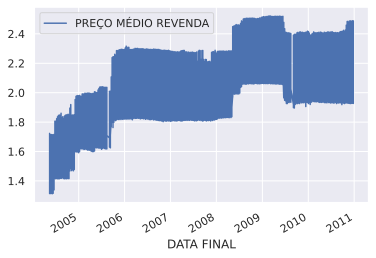

In [194]:
#Modelando o Target
diesel_treino.plot(x = "DATA FINAL", y = "PREÇO MÉDIO REVENDA");

Modelo não é estacionária

In [160]:
#Transformar em Estacionária
def target_diff(x):
  return x.diff().shift(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


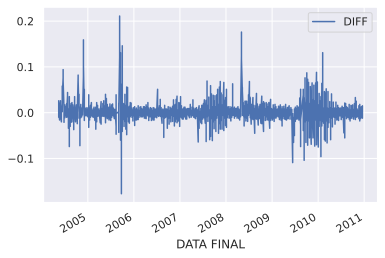

In [161]:
# Tronar Estacionária
diesel_treino["DIFF"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].apply(target_diff)
diesel_treino.plot(x = "DATA FINAL", y = "DIFF")

In [162]:
# DIFF
df_x_treino["DIFF"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].apply(target_diff)
df_x_valid["DIFF"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].apply(target_diff)

In [195]:
#Sazonalidade
df_x_treino["MES"] = diesel_treino["DATA FINAL"].dt.month
df_x_treino["DIA"] = diesel_treino["DATA FINAL"].dt.day
df_x_treino["DIA_DA_SEMANA"] = diesel_treino["DATA FINAL"].dt.weekday
df_x_treino["DIA_DO_ANO"] = diesel_treino["DATA FINAL"].dt.dayofyear


df_x_valid["MES"] = diesel_valid["DATA FINAL"].dt.month
df_x_valid["DIA"] = diesel_valid["DATA FINAL"].dt.day
df_x_valid["DIA_DA_SEMANA"] = diesel_valid["DATA FINAL"].dt.weekday
df_x_valid["DIA_DO_ANO"] = diesel_valid["DATA FINAL"].dt.dayofyear

In [196]:
#Lag
df_x_treino["PRECO_MEDIO_REVENDA_ATUAL"] = diesel_treino["PREÇO MÉDIO REVENDA"]
df_x_valid["PRECO_MEDIO_REVENDA_ATUAL"] = diesel_valid["PREÇO MÉDIO REVENDA"]

In [197]:
# Diferença do Lag
df_x_treino["DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].diff()
df_x_valid["DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].diff()

In [198]:
#Média Móvel
df_x_treino["MDV_PRECO_MEDIO_REVENDA_ATUAL"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].rolling(4).mean().reset_index(level = 0, drop = True)
df_x_valid["MDV_PRECO_MEDIO_REVENDA_ATUAL"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].rolling(4).mean().reset_index(level = 0, drop = True)

### Modelo

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
df_x_treino = df_x_treino.dropna()
df_x_valid = df_x_valid.dropna()

In [202]:
Xtr, ytr = df_x_treino.drop(["DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"], axis = 1), df_x_treino["DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"]
Xvl, yvl = df_x_valid.drop(["DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"], axis = 1), df_x_valid["DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"]

In [219]:
#Criar modelo
mdl = RandomForestRegressor(n_jobs=1, random_state=0, n_estimators=500)
mdl.fit(Xtr, ytr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [220]:
p = mdl.predict(Xvl)
p_final = Xvl["PRECO_MEDIO_REVENDA_ATUAL"] + p
yval_final = Xvl["PRECO_MEDIO_REVENDA_ATUAL"] + yvl

In [221]:
np.sqrt(mean_squared_log_error(yval_final, p_final))*100

0.8088896293132758

In [222]:
np.sqrt(mean_squared_log_error(y_valid[bl_valid.notnull()],
                               bl_valid[bl_valid.notnull()]))*100

0.8133639513965776

## Otimização do Modelo

Primeira linha de cada estado é nulo